### 一、Pytorch 基本操作考察
1. 使用 Tensor 初始化一个 $1\times 3$ 的矩阵 m 和一个 $2\times 1$ 的矩阵 n, 对两矩阵进行减法操作 (要求实现三种不同的形式),
给出输出结果并分析三种方式的不同（如出现报错，试分析报错的原因), 同时需要指出在计算过程中发生了什么

In [1]:
import torch

m = torch.rand(1, 3)
n = torch.rand(2, 1)
print(m.data)
print(n.data)

# 形式一
print("m - n:\n", m - n, "\nm:\n", m, "\nn:\n", n)
# 形式二
print("m.sub(n):\n", m.sub(n), "\nm:\n", m, "\nn:\n", n)
# 形式三
print("m.sub_(n):\n", m.sub_(n), "\nm:\n", m, "\nn:\n", n) # 由于 m、n 形状不同，广播后的矩阵形状与原矩阵 m 不同，故不行，故报错 runtime error

tensor([[0.9780, 0.6685, 0.0917]])
tensor([[0.5032],
        [0.2298]])
m - n:
 tensor([[ 0.4747,  0.1653, -0.4115],
        [ 0.7482,  0.4388, -0.1381]]) 
m:
 tensor([[0.9780, 0.6685, 0.0917]]) 
n:
 tensor([[0.5032],
        [0.2298]])
m.sub(n):
 tensor([[ 0.4747,  0.1653, -0.4115],
        [ 0.7482,  0.4388, -0.1381]]) 
m:
 tensor([[0.9780, 0.6685, 0.0917]]) 
n:
 tensor([[0.5032],
        [0.2298]])


RuntimeError: output with shape [1, 3] doesn't match the broadcast shape [2, 3]

2. 1) 利用 Tensor 创建两个大小分别 $3\times 2$ 和 $4\times 2$ 的随机数矩阵 P 和 Q, 服从均值为 0, 标准差为 $0.01$
的正态分布;

 2) 对第二部得到的矩阵 Q 进行形状变换得到的 Q 的转置 Q$^T$ ;
 
 3）对上述得到的矩阵 P 和矩阵 Q$^T$ 求内积.
 

In [2]:
p = torch.rand(3, 2).normal_(mean=0, std=0.01)
q = torch.rand(2, 1).normal_(mean=0, std=0.01)
print(p)
print(q)

q.t_()
q

print(p * q)

tensor([[-1.5134e-04, -1.1151e-02],
        [ 9.5876e-03,  1.2866e-02],
        [-1.8239e-02, -7.2654e-05]])
tensor([[-0.0074],
        [-0.0024]])
tensor([[ 1.1174e-06,  2.6962e-05],
        [-7.0790e-05, -3.1111e-05],
        [ 1.3467e-04,  1.7568e-07]])


给定公式 $y_3 = y_1+y_2 = x^2+x^3$, 且 $x = 1$. 利用学习所得到的 Tensor 的相关知识，求 $y_3$ 对 $x$ 的梯度，即
$\frac{dy_3}{x}$。

In [4]:
x = torch.tensor(1.0, requires_grad=True)

y1 = x ** 2
with torch.no_grad():
    y2 = x ** 3
y3 = y1 + y2
y3.backward()
print(x.grad)

print(x, x.requires_grad)
print(y1, y1.requires_grad)
print(y2, y2.requires_grad)
print(y3, y3.requires_grad)

tensor(2.)
tensor(1., requires_grad=True) True
tensor(1., grad_fn=<PowBackward0>) True
tensor(1.) False
tensor(2., grad_fn=<AddBackward0>) True


当 $y_2$ 被 ``torch.no_grad()`` 包围时，所有与 $y_2$ 有关的梯度不会回传，只有与 $y_1$ 有关的梯度才会回传，即 $x^2$ 对
$x$ 的梯度。

### 二、动手实现线性回归

1. 要求动手从 0 实现线性回归 (只借助 Tensor 和 Numpy 相关的库) 在人工构造的数据集上进行训练和测试

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import random

num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)

labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

print(features[0], labels[0])

tensor([-0.4122,  0.1689]) tensor(2.8118)


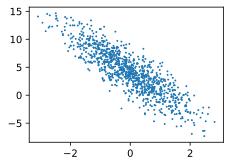

In [15]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [22]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [24]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.4482, -0.0261],
        [ 0.3830, -0.6751],
        [ 0.0187,  0.7201],
        [ 0.0791, -0.6202],
        [-0.9082,  0.2368],
        [ 0.2948,  0.1818],
        [-1.1942,  0.8925],
        [-2.2387, -0.6093],
        [ 0.1870,  0.3794],
        [-0.3121,  0.6479]]) tensor([ 5.1854,  7.2543,  1.8066,  6.4615,  1.5889,  4.1638, -1.2364,  1.8092,
         3.2648,  1.3660])


In [26]:
w = torch.tensor(np.random.normal(0, 0.01, size=(num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

In [30]:
def linereg(X, w, b):
    return torch.mm(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [34]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [43]:
lr = 0.03
num_epochs = 3
net = linereg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)

        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch, train_l.mean().item()))

epoch 0, loss 0.000052
epoch 1, loss 0.000052
epoch 2, loss 0.000052


In [45]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0006],
        [-3.3996]], requires_grad=True)
4.2 
 tensor([4.2000], requires_grad=True)


2. 利用 torch.nn 实现线性回归在人工构造的数据集上进行训练和测试

In [67]:
import torch.utils.data as Data

batch_size = 10

dataset = Data.TensorDataset(features, labels)
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)


In [52]:
for X, y in data_iter:
    print(X, y)
    break

tensor([[-1.6690,  0.4751],
        [ 1.4869, -0.9082],
        [ 0.5315, -1.0036],
        [-1.7488,  0.0353],
        [-1.5499,  0.8828],
        [-0.8917,  0.3870],
        [-0.6404, -2.0505],
        [ 0.8316,  0.8203],
        [-0.9582,  0.8652],
        [-1.1164, -0.4923]]) tensor([-0.7647, 10.2475,  8.6999,  0.5702, -1.9024,  1.0956,  9.8848,  3.0649,
        -0.6727,  3.6370])


In [54]:
from torch import nn

# class LinearNet(nn.Module):
#     def __init__(self, n_feature):
#         super(LinearNet, self).__init__()
#         self.linear = nn.Linear(n_feature, 1)
#
#     def forward(self, x):
#         y = self.linear(x)
#         return y
#
# net = LinearNet(num_inputs)
# print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [57]:
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))

print(net)
print(net[0])

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


In [60]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.0625, -0.3466]], requires_grad=True)
Parameter containing:
tensor([-0.0982], requires_grad=True)


In [62]:
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [64]:
loss = nn.MSELoss()

In [66]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [72]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d: loss = %f' % (epoch, l.item()))

epoch 0: loss = 0.000187
epoch 1: loss = 0.000030
epoch 2: loss = 0.000085


In [73]:
dense = net[0]
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 2.0011, -3.4006]], requires_grad=True)
4.2 Parameter containing:
tensor([4.2004], requires_grad=True)
